In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
%pwd

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/chlxogh011/code/Users/chlxogh01'

In [5]:
train_df = pd.read_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/chlxogh011/code/Users/chlxogh01/train_df.csv')

In [6]:
X = train_df[['GRID_X','GRID_Y','Year','Month','Day','Hour','WS','TA_C','HM']]
Y = train_df['ICE_state']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=42)

In [8]:
std = StandardScaler()
std.fit(x_train)
x_train_scaled = std.transform(x_train)
x_test_scaled = std.transform(x_test)

In [10]:
train_data = lgb.Dataset(x_train_scaled, label=y_train)
test_data = lgb.Dataset(x_test_scaled, label=y_test, reference=train_data)

In [16]:
params = {
    'boosting_type':'gbdt',
    'objective':'multiclass',
    'num_class':3,
    'metric':'multi_logloss',
    'learning_rate':0.1,
    'max_depth':5,
    'num_leaves':31,
    'random_state':42
}

In [17]:
lgbm = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[test_data], early_stopping_rounds=10)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.130165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 5276793, number of used features: 9
[LightGBM] [Info] Start training from score -2.698931
[LightGBM] [Info] Start training from score -0.916832
[LightGBM] [Info] Start training from score -0.629348
[1]	valid_0's multi_logloss: 0.797435
Training until validation scores don't improve for 10 

In [18]:
# 예측 및 평가
y_pred = lgbm.predict(x_test_scaled, num_iteration=lgbm.best_iteration)
y_pred = [np.argmax(line) for line in y_pred]
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.92


In [24]:
precision = precision_score(y_test,y_pred,average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.86


In [26]:
recall = recall_score(y_test,y_pred,average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.81


In [28]:
f1 = f1_score(y_test,y_pred,average='macro')
print(f"f1 score: {f1:.2f}")

f1 score: 0.83


In [32]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 48081  38968   1374]
 [ 16149 479749  30715]
 [   750  24017 679396]]


In [19]:
# 중요 특징 시각화
feature_importances = lgbm.feature_importance()
features = ['GRID_X','GRID_Y','Year','Month','Day','Hour','WS','TA_C','HM']
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

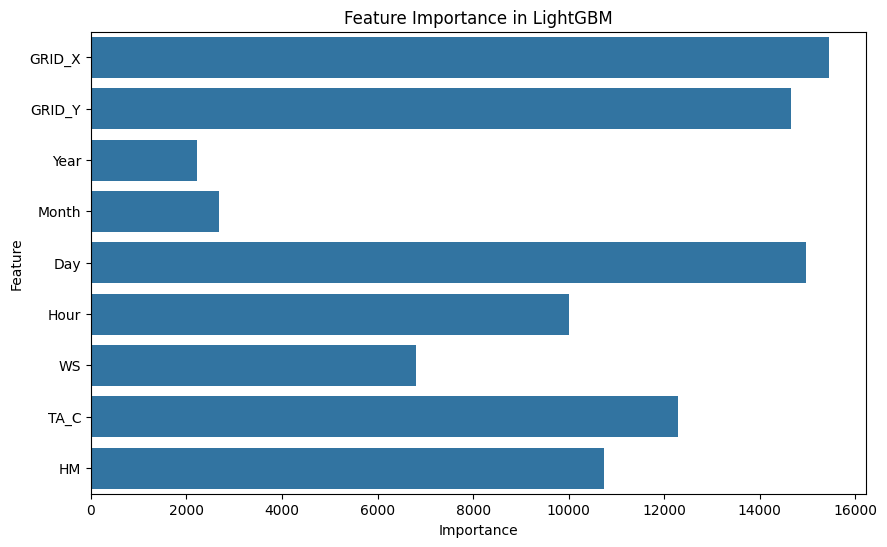

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=importance_df)
plt.title('Feature Importance in LightGBM')
plt.show()

In [21]:
import pickle
with open('/mnt/batch/tasks/shared/LS_root/mounts/clusters/chlxogh011/code/Users/chlxogh01/LGBM_model','wb') as f:
    pickle.dump(lgbm,f)

In [34]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 12.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 5.3 MB/s eta 0:00:00


In [9]:
import catboost as cb

In [10]:
cb = cb.CatBoostClassifier(iterations=1000, depth=3, learning_rate=0.1, random_seed=42, verbose=2)

In [11]:
cb.fit(x_train_scaled,y_train)

0:	learn: 1.0024846	total: 1.35s	remaining: 22m 32s
2:	learn: 0.8702733	total: 3.47s	remaining: 19m 12s
4:	learn: 0.7770284	total: 5.58s	remaining: 18m 31s
6:	learn: 0.7132554	total: 7.72s	remaining: 18m 15s
8:	learn: 0.6619581	total: 9.81s	remaining: 17m 59s
10:	learn: 0.6258495	total: 12s	remaining: 18m 3s
12:	learn: 0.5946122	total: 14.2s	remaining: 18m 1s
14:	learn: 0.5715024	total: 16.3s	remaining: 17m 51s
16:	learn: 0.5541104	total: 18.4s	remaining: 17m 44s
18:	learn: 0.5349831	total: 20.5s	remaining: 17m 37s
20:	learn: 0.5225565	total: 22.7s	remaining: 17m 39s
22:	learn: 0.5119744	total: 24.8s	remaining: 17m 33s
24:	learn: 0.5004292	total: 26.9s	remaining: 17m 27s
26:	learn: 0.4919941	total: 28.9s	remaining: 17m 22s
28:	learn: 0.4850257	total: 31s	remaining: 17m 16s
30:	learn: 0.4773057	total: 33.2s	remaining: 17m 17s
32:	learn: 0.4704367	total: 35.2s	remaining: 17m 12s
34:	learn: 0.4649126	total: 37.3s	remaining: 17m 8s
36:	learn: 0.4602318	total: 39.5s	remaining: 17m 9s
38:	le

In [12]:
y_pred = cb.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


In [13]:
import pickle
with open('/mnt/batch/tasks/shared/LS_root/mounts/clusters/chlxogh011/code/Users/chlxogh01/CB_model','wb') as f:
    pickle.dump(cb,f)

In [14]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [15]:
hgbc = HistGradientBoostingClassifier(max_iter=1000, learning_rate=0.1, max_depth=5, random_state=42)
hgbc.fit(x_train_scaled, y_train)

HistGradientBoostingClassifier(max_depth=5, max_iter=1000, random_state=42)

In [16]:
y_pred = hgbc.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.92


In [18]:
import pickle
with open('/mnt/batch/tasks/shared/LS_root/mounts/clusters/chlxogh011/code/Users/chlxogh01/HGBC_model','wb') as f:
    pickle.dump(hgbc,f)

In [10]:
from catboost import CatBoostClassifier

In [11]:
# 모델 초기화
cb_model = CatBoostClassifier(
    iterations=1000,            # 반복 횟수
    learning_rate=0.1,         # 학습률
    depth=3,                   # 트리의 깊이
    eval_metric='Accuracy',    # 정확도를 평가 지표로 사용
    cat_features=[],           # 범주형 특성이 없으므로 빈 리스트
    verbose=100,               # 100번마다 학습 상태 출력
    random_seed=42
)

In [12]:
# 학습하면서 정확도와 손실 기록
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

In [13]:
# 학습
cb_model.fit(
    x_train_scaled, y_train,
    eval_set=(x_test_scaled, y_test),  # 검증 데이터셋
    use_best_model=True,        # 최상의 모델을 선택
)

0:	learn: 0.7727163	test: 0.7733094	best: 0.7733094 (0)	total: 1.26s	remaining: 20m 59s
100:	learn: 0.8324803	test: 0.8327250	best: 0.8327250 (100)	total: 1m 51s	remaining: 16m 30s
200:	learn: 0.8444529	test: 0.8443753	best: 0.8443753 (200)	total: 3m 40s	remaining: 14m 35s
300:	learn: 0.8518767	test: 0.8518169	best: 0.8518169 (300)	total: 5m 28s	remaining: 12m 43s
400:	learn: 0.8561562	test: 0.8559740	best: 0.8559740 (400)	total: 7m 18s	remaining: 10m 54s
500:	learn: 0.8593320	test: 0.8591441	best: 0.8591441 (500)	total: 9m 6s	remaining: 9m 4s
600:	learn: 0.8622825	test: 0.8619966	best: 0.8620390 (599)	total: 10m 55s	remaining: 7m 15s
700:	learn: 0.8645230	test: 0.8641426	best: 0.8641426 (700)	total: 12m 43s	remaining: 5m 25s
800:	learn: 0.8664746	test: 0.8661021	best: 0.8661135 (796)	total: 14m 31s	remaining: 3m 36s
900:	learn: 0.8681654	test: 0.8677607	best: 0.8677607 (900)	total: 16m 20s	remaining: 1m 47s
999:	learn: 0.8697783	test: 0.8694435	best: 0.8694435 (999)	total: 18m 7s	rema

In [14]:
# 모델 예측
train_preds = cb_model.predict(x_train_scaled)
test_preds = cb_model.predict(x_test_scaled)

In [15]:
# 정확도 계산
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

In [16]:
from sklearn.metrics import log_loss 

# 손실 계산 (log_loss)
train_loss = log_loss(y_train, cb_model.predict_proba(x_train_scaled))
test_loss = log_loss(y_test, cb_model.predict_proba(x_test_scaled))

print(f'Train Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Train Log Loss: {train_loss:.4f}')
print(f'Test Log Loss: {test_loss:.4f}')

Train Accuracy: 86.98%
Test Accuracy: 86.94%
Train Log Loss: 0.3079
Test Log Loss: 0.3081


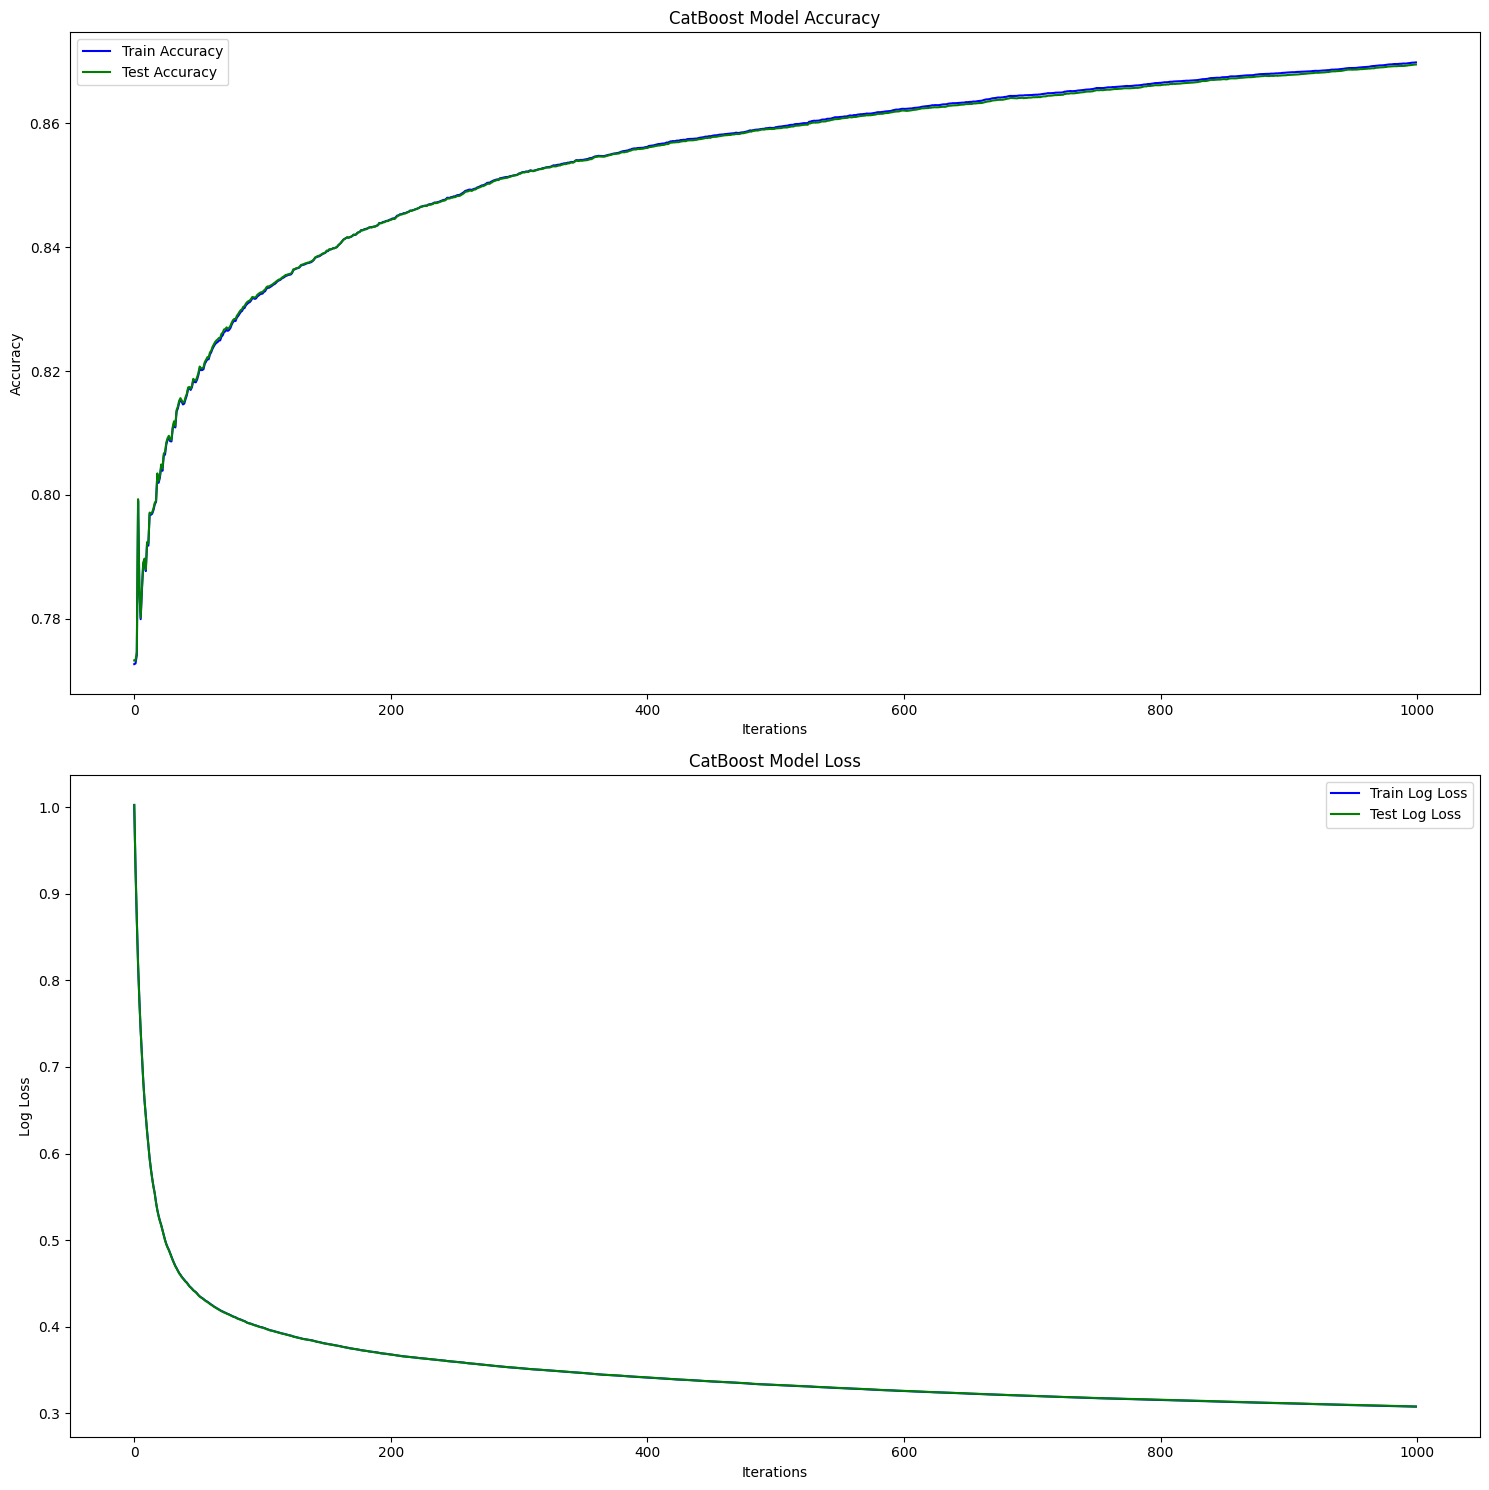

In [21]:
# 그래프 그리기
plt.figure(figsize=(15, 15))

# 정확도 그래프
plt.subplot(2, 1, 1)
plt.plot(cb_model.get_evals_result()['learn']['Accuracy'], label='Train Accuracy', color='blue')
plt.plot(cb_model.get_evals_result()['validation']['Accuracy'], label='Test Accuracy', color='green')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('CatBoost Model Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(2, 1, 2)
plt.plot(cb_model.get_evals_result()['learn']['MultiClass'], label='Train Log Loss', color='blue')
plt.plot(cb_model.get_evals_result()['validation']['MultiClass'], label='Test Log Loss', color='green')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('CatBoost Model Loss')
plt.legend()

plt.tight_layout()
# plt.show()

plt.savefig('/mnt/batch/tasks/shared/LS_root/mounts/clusters/chlxogh011/code/Users/chlxogh01/CB_loss,accuracy.png')